In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes import param
from data_analysis_codes.tools import LinData
from Tools import PlotPFLRW

$$ -\dot{\theta} = \frac{1}{3}\theta^2 + 2\sigma^2 + \kappa \rho$$

$$ \dot{K} = \frac{1}{3}K^2 + 2A^2 + \kappa \rho $$

In [2]:
def plotvar(p, var, loc, lab, have_plot):
    Lin = LinData.LinData_Class(p)
    a_lin = Lin.a('h5')
    x = a_lin/a_lin[0]
    
    var_data, f = PlotPFLRW.read_hdf5_data(p, var+'_'+loc)
    x = x[:len(var_data)]
    
    var_error, have_error = PlotPFLRW.geterror(p, 'h5', var+'_'+loc, x)
    var_errortop = PlotPFLRW.ferr(var_data, var_error)+var_error
    var_errordow = PlotPFLRW.ferr(var_data, var_error)-var_error
    
    if var=='K':
        K_lin = Lin.K('h5')[:len(var_data)]
        var_data = (1/3)*(var_data**2-K_lin**2)
        var_errortop = (1/3)*(var_errortop**2-PlotPFLRW.ferr(K_lin, var_error)**2)
        var_errordow = (1/3)*(var_errordow**2-PlotPFLRW.ferr(K_lin, var_error)**2)
    elif var=='A2':
        var_data = 2*var_data
        var_errortop = 2*var_errortop
        var_errordow = 2*var_errordow
    elif var=='rho':
        rho_lin = Lin.rho('h5')[:len(var_data)]
        var_data = Lin.kappa*(var_data-rho_lin)/2
        var_errortop = Lin.kappa*(var_errortop-PlotPFLRW.ferr(rho_lin, var_error))/2
        var_errordow = Lin.kappa*(var_errordow-PlotPFLRW.ferr(rho_lin, var_error))/2
    
    if have_plot:
        plt.semilogy(x, abs(var_data), linewidth=4, label=lab)

        var_errortopf = []
        var_errordowf = []
        for ito, ido in zip(var_errortop, var_errordow):
            var_errortopf += [max(abs(ito), abs(ido))]
            var_errordowf += [min(abs(ito), abs(ido))]

        if have_error:
            plt.fill_between(PlotPFLRW.ferr(x, var_error), var_errordowf, var_errortopf, alpha=0.2)
    else:
        return var_data, var_errortop, var_errordow
    
def plotdK(p, loc):
    Lin = LinData.LinData_Class(p)
    a_lin = Lin.a('h5')
    x = a_lin/a_lin[0]
    
    TK, TKet, TKed = plotvar(p, 'K', loc, 'dK', False)
    TA, TAet, TAed = plotvar(p, 'A2', loc, 'dK', False)
    Tr, Tret, Tred = plotvar(p, 'rho', loc, 'dK', False)
    
    var_data = TK+TA+Tr
    var_errortop = TKet+TAet+Tret
    var_errordow = TKed+TAed+Tred
    
    x = x[:len(var_data)]
    plt.semilogy(x, abs(var_data), linewidth=4, label=r'$|\dot{K}-\dot{\bar{K}}|$')

    var_errortopf = []
    var_errordowf = []
    for ito, ido in zip(var_errortop, var_errordow):
        var_errortopf += [max(abs(ito), abs(ido))]
        var_errordowf += [min(abs(ito), abs(ido))]

    plt.fill_between(PlotPFLRW.ferr(x, var_errortop), var_errordowf, var_errortopf, alpha=0.2)
    
def getvars(p, loc):
    
    plotdK(p, loc)
    plotvar(p, 'K', loc, r'$|\frac{1}{3}(K^2-\bar{K}^2)|$', True)
    plotvar(p, 'A2', loc, r'$|2A^2|$', True)
    plotvar(p, 'rho', loc, r'$|\frac{\kappa}{2}(\rho-\bar{\rho})|$', True)
    plt.grid()

def plotRay(p):
    plt.figure(figsize=(20, 15))
    
    plt.subplot(221)
    getvars(p, 'av')
    plt.title(p.sim_name+' \n Average')
    
    plt.subplot(222)
    getvars(p, 'cent')
    plt.title('Center')
    plt.legend(bbox_to_anchor=(1,1))
    
    plt.subplot(223)
    getvars(p, 'OD')
    plt.xlabel(r'$a/a_{IN}$')
    plt.title('Over-density')
    
    plt.subplot(224)
    getvars(p, 'UD')
    plt.xlabel(r'$a/a_{IN}$')
    plt.title('Under-density')

In [3]:
A1e2_L6_z200_N128      = param.pflrw_A1e2_L6_z200_N128()
A001138792_L6_z200_N64 = param.pflrw_A001138792_L6_z200_N64()
A1e3_L6_z200_N64       = param.pflrw_A1e3_L6_z200_N64()
A1e4_L6_z200_N128      = param.pflrw_A1e4_L6_z200_N128()
A1e5_L6_z200_N64       = param.pflrw_A1e5_L6_z200_N64()
A1e6_L6_z200_N128      = param.pflrw_A1e6_L6_z200_N128()
A1e7_L6_z200_N128      = param.pflrw_A1e7_L6_z200_N128()
pall = [A1e2_L6_z200_N128, A001138792_L6_z200_N64, A1e3_L6_z200_N64, A1e4_L6_z200_N128, A1e5_L6_z200_N64, A1e6_L6_z200_N128, A1e7_L6_z200_N128]

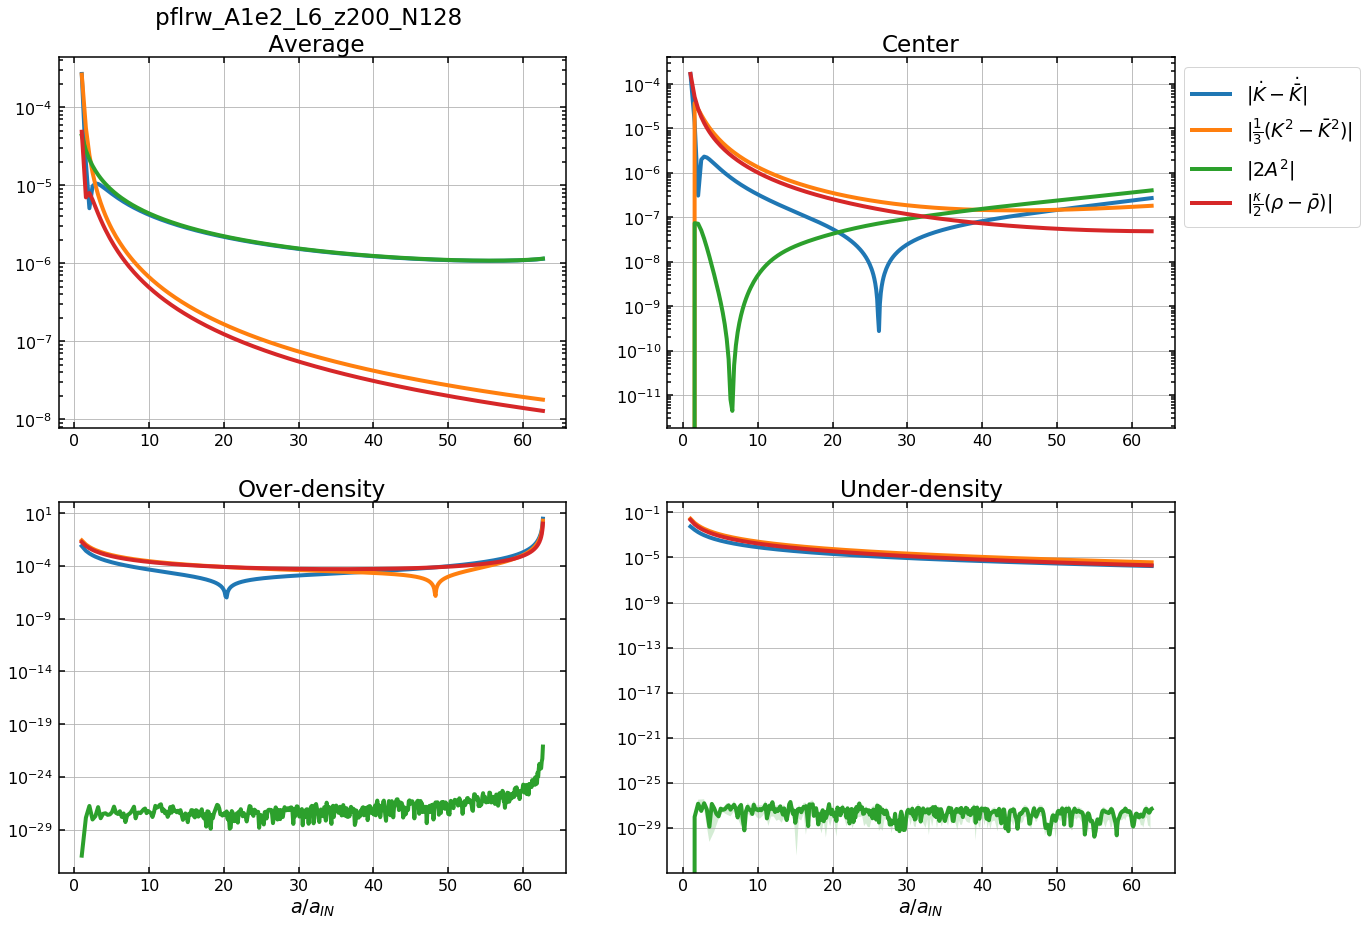

In [4]:
for p in [A1e2_L6_z200_N128]:
    plotRay(p)
    path = '/home/robynm/ET/pflrwcodes/Plots/'+p.sim_name+'_'
    plt.savefig(path+'Ray_contrib')